#Digitale Bilverarbeitung

Bibliotheken importieren

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



Daten laden und vorverarbeiten, Data Augmentation

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


train_datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.15,
    shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

train_datagen.fit(train_images)

11490434/11490434 [==============================] - 0s 0us/step


Convolutional Neural Network erstellen

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Modell kompilieren

In [4]:
model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Modell trainieren

In [5]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 44s 55ms/step - loss: 0.2741 - accuracy: 0.9162 - val_loss: 0.0581 - val_accuracy: 0.9826
Epoch 2/10
750/750 [==============================] - 40s 53ms/step - loss: 0.0814 - accuracy: 0.9764 - val_loss: 0.0500 - val_accuracy: 0.9851
Epoch 3/10
750/750 [==============================] - 41s 54ms/step - loss: 0.0553 - accuracy: 0.9842 - val_loss: 0.0434 - val_accuracy: 0.9868
Epoch 4/10
750/750 [==============================] - 41s 54ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0348 - val_accuracy: 0.9885
Epoch 5/10
750/750 [==============================] - 38s 50ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0380 - val_accuracy: 0.9877
Epoch 6/10
750/750 [==============================] - 38s 50ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 7/10
750/750 [==============================] - 39s 52ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy:

Modell evaluieren

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0273 - accuracy: 0.9932
Test Loss: 0.027301596477627754
Test Accuracy: 0.9932000041007996


Erstellung einer Confusion Matrix

313/313 [==============================] - 2s 7ms/step


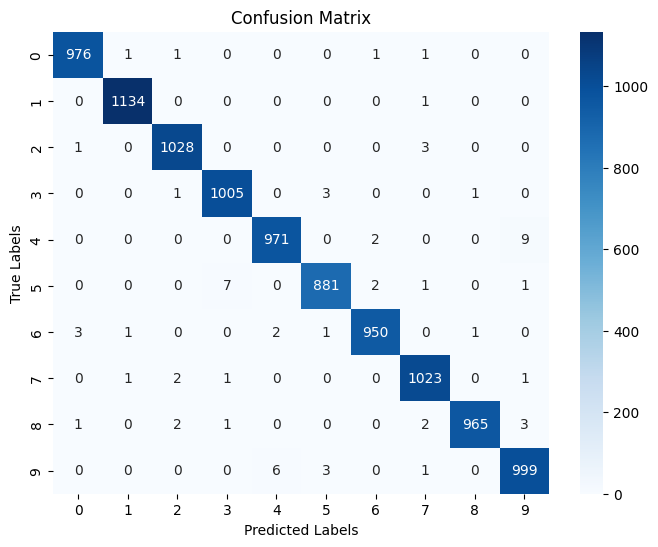

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
